# Coding Exercises (Part 12)

## Financial Data: Essential Workflows

### Exercise 12: Financial Time Series

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

Import the us stocks dataset (__us_stocks.csv__) and select the Adjusted Close (__Adj Close__) for all six stocks from __31-12-2015__ (incl.) until __31-12-2018__ (incl.). Save the DataFrame in the variable __stocks__ and work through the next questions with this DataFrame!

- __Visualize__ the Adjusted Close of the six stocks __over time__!

- __Visualize__ the __normalized__ Adjusted Close of the six stocks __over time__, each starting at a __Base Value of 100__!

- Calculate __monthly returns__ for all six stocks and create a new __returns__ DataFrame!

- Calculate the __annualized mean return__ and the __annualized standard deviation__ of returns for all six stocks!

- __Visualize risk/return__ of all six stocks in a (total) risk / return framework. (annualized std on the x-axis, annualized mean returns on the y-axis). <br>
Identify the __best performing__ stock and the __worst performing__ stock (in terms of __risk / return__)

- __Visualize__ the __correlation matrix__ of monthly returns with a __Seaborn Heatmap__. Which stocks-pair shows the __highest (positive) correlation__ of monthly returns?

__Ticker Symbols__:
- AXP : American Express
- FB : Facebook
- INTC : Intel
- MCD : McDonalds 
- PG : Procter & Gamble
- WMT: Walmart

------------------------

## Option 2: Guided and Instructed

# STOP HERE, IF YOU WANT TO DO THE EXERCISE ON YOUR OWN!

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [19]:
#run the cell!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
%config InlineBackened.format_figure = 'svg'

In [17]:
pd.options.display.float_format = "{:.4f}".format

105. __Import__ daily stock price data (__us_stocks.csv__) and __inspect__! Handle the __MultiIndex__! __Fill in the gaps__!

In [24]:
stocks = pd.read_csv("us_stocks.csv")
stocks.head()

,Unnamed: 0,Open,Open.1,Open.2,Open.3,Open.4,Open.5,High,High.1,High.2,...,Adj Close.2,Adj Close.3,Adj Close.4,Adj Close.5,Volume,Volume.1,Volume.2,Volume.3,Volume.4,Volume.5
0,NaN,AXP,FB,INTC,MCD,PG,WMT,AXP,FB,INTC,...,INTC,MCD,PG,WMT,AXP,FB,INTC,MCD,PG,WMT
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-12-31,40.900002,NaN,20.6,62.970001,61.52,54.25,41.080002,NaN,20.719998999999998,...,15.252899,47.055138,45.146072,42.548668,4030500,NaN,26429200,4495300,5942200,9764800
3,2010-01-04,40.810001,NaN,20.790001,62.630001,61.110001000000004,53.740002000000004,41.099998,NaN,21.030001000000002,...,15.611791,47.311375,45.510940999999995,43.169579,6894300,NaN,47800900,5839300,9190800,20753100
4,2010-01-05,40.830002,NaN,20.940001000000002,62.66,61.130001,54.09,41.23,NaN,20.99,...,15.604316,46.949627,45.525822,42.739723,10641200,NaN,52357700,7099000,8649400,15648400


In [26]:
stocks.axes

[RangeIndex(start=0, stop=2266, step=1),
 Index(['Unnamed: 0', 'Open', 'Open.1', 'Open.2', 'Open.3', 'Open.4', 'Open.5',
        'High', 'High.1', 'High.2', 'High.3', 'High.4', 'High.5', 'Low',
        'Low.1', 'Low.2', 'Low.3', 'Low.4', 'Low.5', 'Close', 'Close.1',
        'Close.2', 'Close.3', 'Close.4', 'Close.5', 'Adj Close', 'Adj Close.1',
        'Adj Close.2', 'Adj Close.3', 'Adj Close.4', 'Adj Close.5', 'Volume',
        'Volume.1', 'Volume.2', 'Volume.3', 'Volume.4', 'Volume.5'],
       dtype='object')]

In [49]:
stocks = pd.read_csv("us_stocks.csv", header = [0,1] , index_col = [0], parse_dates= [0])
stocks.head()

Open                                        High              \
               AXP  FB    INTC     MCD      PG     WMT     AXP  FB    INTC   
Date                                                                         
2009-12-31 40.9000 NaN 20.6000 62.9700 61.5200 54.2500 41.0800 NaN 20.7200   
2010-01-04 40.8100 NaN 20.7900 62.6300 61.1100 53.7400 41.1000 NaN 21.0300   
2010-01-05 40.8300 NaN 20.9400 62.6600 61.1300 54.0900 41.2300 NaN 20.9900   
2010-01-06 41.2300 NaN 20.8100 62.2000 60.9400 53.5000 41.6700 NaN 20.9300   
2010-01-07 41.2600 NaN 20.7300 61.2500 60.5800 53.7200 42.2400 NaN 20.7600   

                    ... Adj Close                            Volume      \
               MCD  ...      INTC     MCD      PG     WMT       AXP  FB   
Date                ...                                                   
2009-12-31 63.0700  ...   15.2529 47.0551 45.1461 42.5487   4030500 NaN   
2010-01-04 63.0700  ...   15.6118 47.3114 45.5109 43.1696   6894300 NaN   
2010-01-05 62.7500  ...   15.6043 46.9496 45.5258 42.7397  10641200 NaN   
2010-01-06 62.4100  ...   15.5520 46.3091 45.3099 42.6442   8399400 NaN   
2010-01-07 62.3400  ...   15.4024 46.6482 45.0642 42.6681   8981700 NaN   

                                                   
                INTC       MCD       PG       WMT  
Date                                               
2009-12-31  26429200   4495300  5942200   9764800  
2010-01-04  47800900   5839300  9190800  20753100  
2010-01-05  52357700   7099000  8649400  15648400  
2010-01-06  40037400  10551300  9908400  12517200  
2010-01-07  54041500   7517700  8972800  10662700  

[5 rows x 36 columns]

In [51]:
stocks.columns = stocks.columns.to_flat_index()
stocks.head()

,"(Open, AXP)","(Open, FB)","(Open, INTC)","(Open, MCD)","(Open, PG)","(Open, WMT)","(High, AXP)","(High, FB)","(High, INTC)","(High, MCD)",...,"(Adj Close, INTC)","(Adj Close, MCD)","(Adj Close, PG)","(Adj Close, WMT)","(Volume, AXP)","(Volume, FB)","(Volume, INTC)","(Volume, MCD)","(Volume, PG)","(Volume, WMT)"
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,40.9000,NaN,20.6000,62.9700,61.5200,54.2500,41.0800,NaN,20.7200,63.0700,...,15.2529,47.0551,45.1461,42.5487,4030500,NaN,26429200,4495300,5942200,9764800
2010-01-04,40.8100,NaN,20.7900,62.6300,61.1100,53.7400,41.1000,NaN,21.0300,63.0700,...,15.6118,47.3114,45.5109,43.1696,6894300,NaN,47800900,5839300,9190800,20753100
2010-01-05,40.8300,NaN,20.9400,62.6600,61.1300,54.0900,41.2300,NaN,20.9900,62.7500,...,15.6043,46.9496,45.5258,42.7397,10641200,NaN,52357700,7099000,8649400,15648400
2010-01-06,41.2300,NaN,20.8100,62.2000,60.9400,53.5000,41.6700,NaN,20.9300,62.4100,...,15.5520,46.3091,45.3099,42.6442,8399400,NaN,40037400,10551300,9908400,12517200
2010-01-07,41.2600,NaN,20.7300,61.2500,60.5800,53.7200,42.2400,NaN,20.7600,62.3400,...,15.4024,46.6482,45.0642,42.6681,8981700,NaN,54041500,7517700,8972800,10662700


In [53]:
pd.MultiIndex.from_tuples(stocks.columns)

MultiIndex([(     'Open',  'AXP'),
            (     'Open',   'FB'),
            (     'Open', 'INTC'),
            (     'Open',  'MCD'),
            (     'Open',   'PG'),
            (     'Open',  'WMT'),
            (     'High',  'AXP'),
            (     'High',   'FB'),
            (     'High', 'INTC'),
            (     'High',  'MCD'),
            (     'High',   'PG'),
            (     'High',  'WMT'),
            (      'Low',  'AXP'),
            (      'Low',   'FB'),
            (      'Low', 'INTC'),
            (      'Low',  'MCD'),
            (      'Low',   'PG'),
            (      'Low',  'WMT'),
            (    'Close',  'AXP'),
            (    'Close',   'FB'),
            (    'Close', 'INTC'),
            (    'Close',  'MCD'),
            (    'Close',   'PG'),
            (    'Close',  'WMT'),
            ('Adj Close',  'AXP'),
            ('Adj Close',   'FB'),
            ('Adj Close', 'INTC'),
            ('Adj Close',  'MCD'),
            ('Adj Cl

In [55]:
stocks.columns = stocks.columns.to_flat_index()
stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)
stocks.head()

Open                                        High              \
               AXP  FB    INTC     MCD      PG     WMT     AXP  FB    INTC   
Date                                                                         
2009-12-31 40.9000 NaN 20.6000 62.9700 61.5200 54.2500 41.0800 NaN 20.7200   
2010-01-04 40.8100 NaN 20.7900 62.6300 61.1100 53.7400 41.1000 NaN 21.0300   
2010-01-05 40.8300 NaN 20.9400 62.6600 61.1300 54.0900 41.2300 NaN 20.9900   
2010-01-06 41.2300 NaN 20.8100 62.2000 60.9400 53.5000 41.6700 NaN 20.9300   
2010-01-07 41.2600 NaN 20.7300 61.2500 60.5800 53.7200 42.2400 NaN 20.7600   

                    ... Adj Close                            Volume      \
               MCD  ...      INTC     MCD      PG     WMT       AXP  FB   
Date                ...                                                   
2009-12-31 63.0700  ...   15.2529 47.0551 45.1461 42.5487   4030500 NaN   
2010-01-04 63.0700  ...   15.6118 47.3114 45.5109 43.1696   6894300 NaN   
2010-01-05 62.7500  ...   15.6043 46.9496 45.5258 42.7397  10641200 NaN   
2010-01-06 62.4100  ...   15.5520 46.3091 45.3099 42.6442   8399400 NaN   
2010-01-07 62.3400  ...   15.4024 46.6482 45.0642 42.6681   8981700 NaN   

                                                   
                INTC       MCD       PG       WMT  
Date                                               
2009-12-31  26429200   4495300  5942200   9764800  
2010-01-04  47800900   5839300  9190800  20753100  
2010-01-05  52357700   7099000  8649400  15648400  
2010-01-06  40037400  10551300  9908400  12517200  
2010-01-07  54041500   7517700  8972800  10662700  

[5 rows x 36 columns]

In [ ]:
# run the cell!
stocks.head()

Ticker Symbols:
- AXP : American Express
- FB : Facebook
- INTC : Intel
- MCD : McDonalds 
- PG : Procter & Gamble
- WMT: Walmart

106. __Select__ the Adjusted Close (__Adj Close__) for all six stocks from __31-12-2015__ (incl.) until __31-12-2018__ (incl.)! __Overwrite__ stocks! <br>
__How many Timestamps__ / Days are in the DataFrame now?

In [57]:
stocks = stocks['Adj Close'].copy().loc["2015-12-31":"2018-12-31"]

In [59]:
# run the cell!
stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.9103,104.6600,31.4376,108.9686,71.4507,56.7227
2016-01-04,64.0528,102.2200,31.0178,108.4521,70.5149,56.8708
2016-01-05,63.0673,102.7300,30.8718,109.9463,70.7399,58.2217
2016-01-06,61.3159,102.9700,30.1874,109.2085,70.0561,58.8047
2016-01-07,60.7639,97.9200,29.0558,106.6812,69.4442,60.1742


In [61]:
# run the cell!
stocks.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2015-12-31 to 2018-12-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AXP     754 non-null    float64
 1   FB      754 non-null    float64
 2   INTC    754 non-null    float64
 3   MCD     754 non-null    float64
 4   PG      754 non-null    float64
 5   WMT     754 non-null    float64
dtypes: float64(6)
memory usage: 41.2 KB


We have ... 754 Days.

107. __Plot__ stocks (figsize (12, 8)!

<Figure size 1200x800 with 0 Axes>

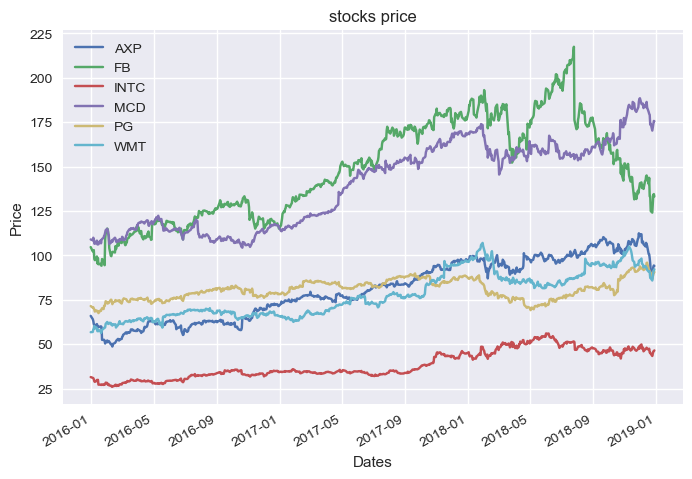

In [65]:
plt.figure(figsize= (12,8))
stocks.plot()
plt.title("stocks price")
plt.xlabel("Dates")
plt.ylabel("Price")
plt.legend()
plt.show()

In [75]:
stocks.columns

Index(['AXP', 'FB', 'INTC', 'MCD', 'PG', 'WMT'], dtype='object')

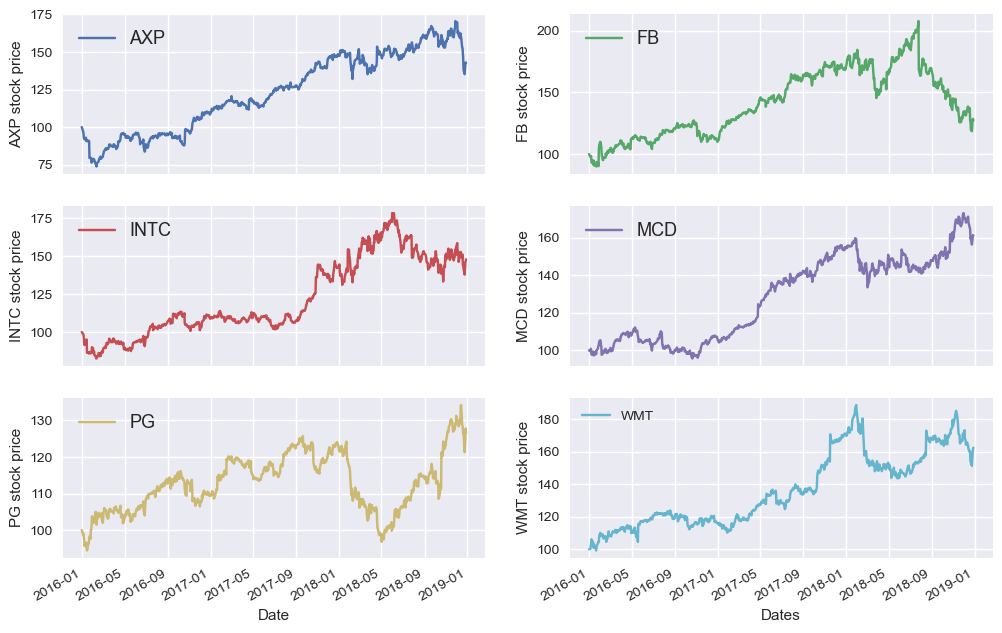

In [249]:
axes = stocks.div(stocks.iloc[0]).mul(100).plot(subplots = True, 
           layout = (3,2),
           sharex = True,
           figsize = (12,8),
           ylabel = "Price"
           )

for ticker , ax in zip(stocks.columns , axes.flatten()):
    ax.set_ylabel(f"{ticker} stock price")
    ax.legend(loc = "upper left" , 
              fontsize = 13)
    
plt.xlabel("Dates")
plt.legend()
plt.show()

108. __Bring__ the six stocks to the __same Base Value__ (100) and __plot__ again! __Fill in the gaps!__

In [117]:
stocks_min = stocks.describe().T.loc[:,["min","max"]].min()
stocks_min

min   25.9790
max   56.0250
dtype: float64

In [119]:
stocks_max = stocks.describe().T.loc[:,["min","max"]].max()
stocks_max

min   104.3187
max   217.5000
dtype: float64

In [103]:
stocks.describe().T.loc[:,["min","max"]]

,min,max
AXP,48.6473,112.4299
FB,94.1600,217.5000
INTC,25.9790,56.0250
MCD,104.3187,188.5100
PG,67.4647,95.8816
WMT,56.2971,107.0101


In [123]:
stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.9103,104.6600,31.4376,108.9686,71.4507,56.7227
2016-01-04,64.0528,102.2200,31.0178,108.4521,70.5149,56.8708
2016-01-05,63.0673,102.7300,30.8718,109.9463,70.7399,58.2217
2016-01-06,61.3159,102.9700,30.1874,109.2085,70.0561,58.8047
2016-01-07,60.7639,97.9200,29.0558,106.6812,69.4442,60.1742


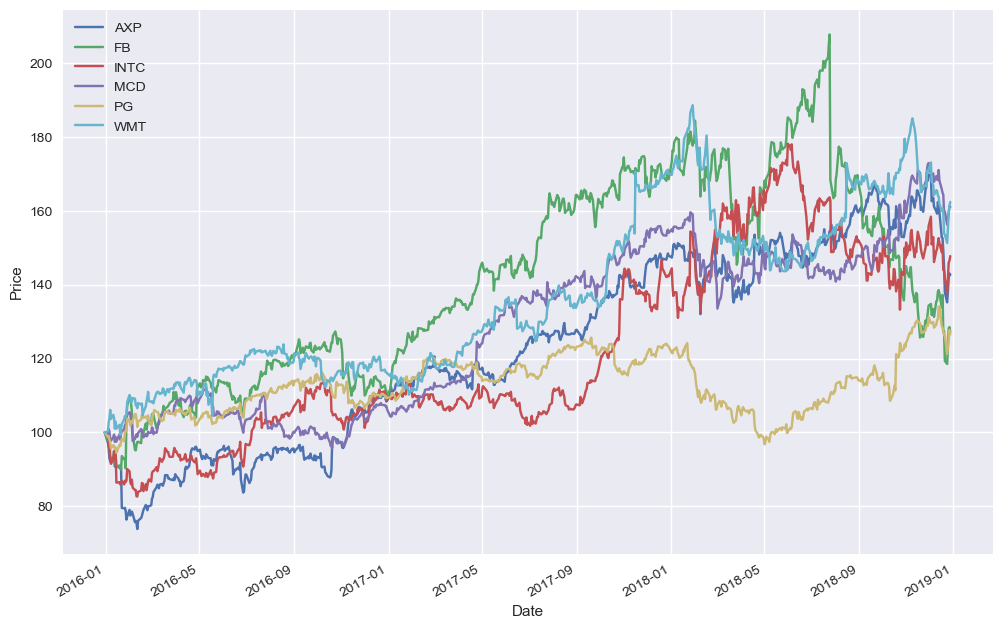

In [125]:
stocks.div(stocks.iloc[0]).mul(100).plot(figsize = (12,8),
                                        ylabel = "Price")
plt.show()

Still hard to compare performance, right?

109. __Resample__ stocks to __monthly__ frequency (__last__ trading price of each month, index should show last calender day)!<br> __Save__ the resampled Dataframe in the variable __stocks_m__!

In [225]:
stocks_m = stocks.resample("M").last()

In [227]:
# run the cell!
stocks_m.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2015-12-31,65.9103,104.6600,31.4376,108.9686,71.4507,56.7227
2016-01-31,50.9221,112.2100,28.3075,114.1708,74.1427,61.4049
2016-02-29,52.9019,106.9200,27.2402,108.9113,72.8721,61.3864
2016-03-31,58.4415,114.1000,29.7811,116.8015,74.7054,63.8450
2016-04-30,62.5788,117.5800,27.8754,117.5543,73.3130,62.3349


110. Calculate __monthly returns__ and __save__ the result in the variable __ret__! (drop NaN Values!)

In [229]:
ret = stocks_m.pct_change().dropna()

In [231]:
#run the cell!
ret

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2016-01-31,-0.2274,0.0721,-0.0996,0.0477,0.0377,0.0825
2016-02-29,0.0389,-0.0471,-0.0377,-0.0461,-0.0171,-0.0003
2016-03-31,0.1047,0.0672,0.0933,0.0724,0.0252,0.0401
2016-04-30,0.0708,0.0305,-0.0640,0.0064,-0.0186,-0.0237
2016-05-31,0.0050,0.0105,0.0523,-0.0350,0.0115,0.0662
2016-06-30,-0.0714,-0.0381,0.0383,-0.0068,0.0448,0.0316
2016-07-31,0.0609,0.0845,0.0628,-0.0224,0.0188,-0.0007
2016-08-31,0.0174,0.0176,0.0374,-0.0093,0.0201,-0.0143
2016-09-30,-0.0235,0.0170,0.0518,-0.0026,0.0279,0.0095


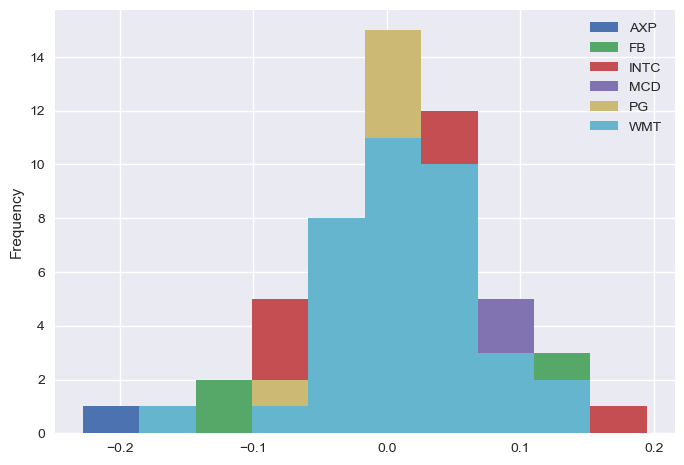

In [271]:
ret.plot.hist()
plt.show()

111. Calculate __mean__ and  __standard deviation__ of monthly returns! __Save__ the result in the variable __summary__!<br>
__Fill in the gaps!__

In [234]:
ret.describe().T.loc[:,["mean","std"]]

,mean,std
AXP,0.0122,0.0655
FB,0.0087,0.0632
INTC,0.0126,0.0590
MCD,0.0142,0.0418
PG,0.0074,0.0399
WMT,0.0150,0.0541


In [273]:
summary = ret.agg(["mean","std"]).T

In [170]:
summary = ret.agg([---, ---]).T

SyntaxError: invalid syntax (2646625775.py, line 1)

In [275]:
#run the cell!
summary

,mean,std
AXP,0.0122,0.0655
FB,0.0087,0.0632
INTC,0.0126,0.0590
MCD,0.0142,0.0418
PG,0.0074,0.0399
WMT,0.0150,0.0541


112. __Annualize__ mean and standard deviation of returns! __Fill in the gaps!__

In [277]:
summary["annual_mean"] = summary["mean"]*12
summary["annual_std"] = summary["std"]*np.sqrt(12)

In [279]:
#run the cell!
summary

,mean,std,annual_mean,annual_std
AXP,0.0122,0.0655,0.1459,0.2267
FB,0.0087,0.0632,0.1039,0.2189
INTC,0.0126,0.0590,0.1507,0.2043
MCD,0.0142,0.0418,0.1701,0.1449
PG,0.0074,0.0399,0.0883,0.1384
WMT,0.0150,0.0541,0.1800,0.1872


113. __Plot__ and __compare__ the performance of the six stocks in a __(total) risk / return__ framework! __Fill in the gaps__! <br>
Can you identify the __best performing__ stock and the __worst performing__ stock (in terms of __risk / return__)?

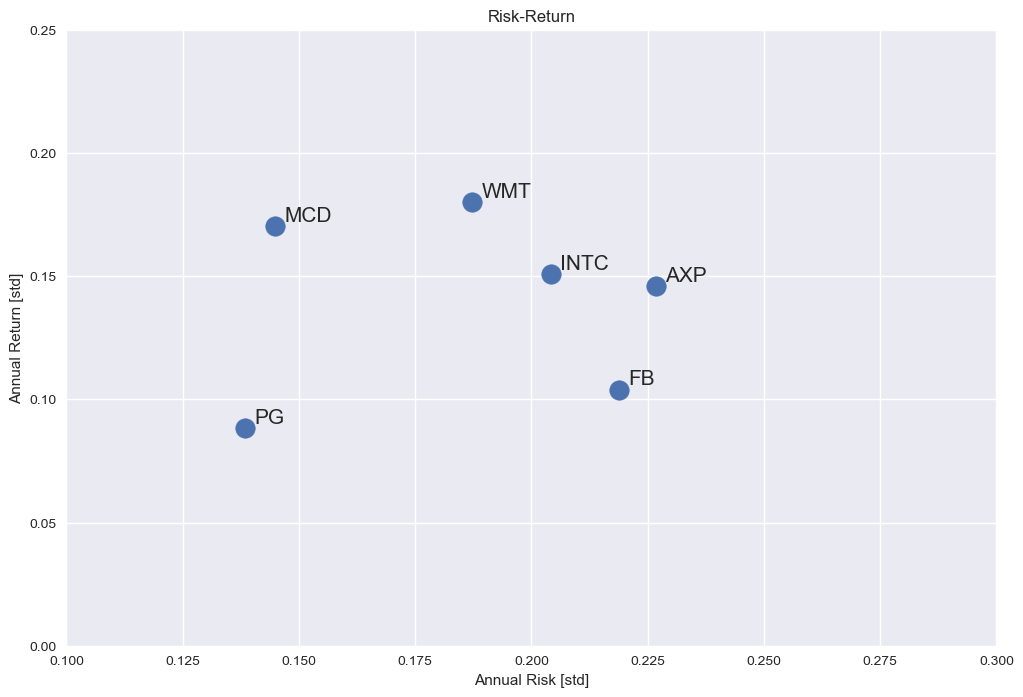

In [299]:
summary.plot(kind = "scatter",
            x = "annual_std",
            y = "annual_mean",
            title = "Risk-Return",
            xlabel = "Annual Risk [std]",
            ylabel = "Annual Return [std]",
            xlim = [0.1,0.3],
            ylim = [0.00, 0.25],
            figsize = (12,8),
            s = 200)
for i in summary.index:
    plt.annotate(text= i , 
                 xy = (summary.loc[i, "annual_std"] + 0.002, 
                       summary.loc[i,"annual_mean"] + 0.002),
                 size = 15
                )
plt.show()

In [285]:
summary.plot(kind = "---", x = "---", y = "---", figsize = (12, 8), s = 50, fontsize = 15, xlim = (0.1, 0.3), ylim = (0, 0.25))
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In a (total) risk / return framework, McDonalds (most likely) showed the best performance (upper left) and facebook the worst performance (lower right)!

114. Prepare the __correlation matrix__ of monthly returns. Which stocks-pair shows the __highest (positive) correlation__ of monthly returns? 

In [301]:
ret.corr().style.background_gradient(cmap = "RdYlGn", axis = 1)

,AXP,FB,INTC,MCD,PG,WMT
AXP,1.000000,0.068655,0.306292,0.261880,-0.099335,-0.048483
FB,0.068655,1.000000,0.169326,0.069091,-0.008261,0.149272
INTC,0.306292,0.169326,1.000000,0.084089,-0.074533,0.129686
MCD,0.261880,0.069091,0.084089,1.000000,0.177252,0.505501
PG,-0.099335,-0.008261,-0.074533,0.177252,1.000000,0.359595
WMT,-0.048483,0.149272,0.129686,0.505501,0.359595,1.000000


The highest positive correlation of returns is between ... Walmart and McDonalds.

115. __Visualize__ the correlation matrix with a __Seaborn Heatmap__! __Fill in the gaps!__

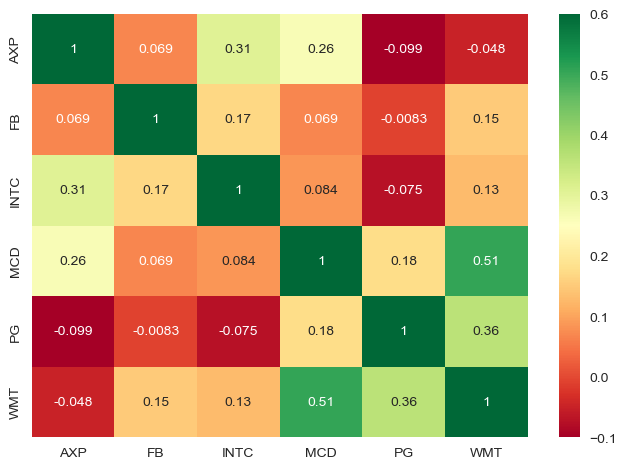

In [295]:
sns.heatmap(ret.corr() , 
            annot = True, 
            vmin = -0.1, 
            vmax = +0.6 , 
            cmap = 'RdYlGn')
plt.show()

In [ ]:
# run the cell!
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.0)
sns.---(---, cmap = "RdYlGn", annot = True, vmin = -0.5, vmax = 0.6, center = 0)
plt.show()

# Well Done!

-------------------

# Hints (Spoiler!)

105. The first two rows (index pos. 0 & 1) form the MultiIndex. The Column with Datetime information is at index pos. 0.

106. stocks = stocks.loc[---:---, ---]

107. plot() method


108. div() method, plot() method

109. resample() method, last() method, use "M"

110. pct_change() method, dropna() method

111. agg() method, "mean" and "std"

112. *12 and *np.sqrt(12)

113. scatterplot, std and mean

114. corr() method

115. heatmap, ret.corr()